In [1]:
import numpy as np
import xarray as xr
import pickle
import pandas as pd
import time
import os

import datetime
from sys import getsizeof,path

import matplotlib.pyplot as plt
import matplotlib

path.append("../src")
from Splines import CentripetalCatmullRomSpline_splitControls,Spline

import pymc3
import theano
import theano.tensor as tt


#theano.config.gcc_cxxflags = "-Wno-c++11-narrowing"


In [ ]:
cpx = np.array([2,4,6,8,12,13],"float64")
cpy1 = np.array([1,2,2,3,1,2],"float64")
cpy2 = np.array([2,3,4,2,5,6],"float64")
cpy3 = np.array([4,3,4,-3,-4,-3.5],dtype="float64")

cpx = np.array(cpx)
cpy = tt.stack([cpy1,cpy2,cpy3])

space = np.linspace(1,10,64,"float64")

#print(cpx)
#print(cpy.eval())
#print(space,space.dtype)

s1 = Spline(cpx,cpy)
c = s1.EvaluateAt(space,True)

#print(c.eval())

In [ ]:
print(s1.cpx)

In [ ]:
plt.plot(space,c.eval())

In [ ]:
cpx = np.array([1,2,3,4],"float64")
cpy1 = np.array([1,1,2,2],"float64")
cpy2 = np.array([3,3,3,0.8],"float64")
#cpy2 = np.array([1,3000000,-3000000,-1,300000],"float64")
#cpy3 = np.array([4,3,4,-3,-4,-3.5],dtype="float64")

cpx = np.array(cpx)
cpy_r1 = tt.cast(cpy1.reshape((1,cpy1.shape[0])),"float64")
cpy_r2 = tt.stack([cpy1,cpy2])

space = np.linspace(1.5,3.75,64,"float64")

print(cpx)
print(space,space.dtype)


s1 = Spline(cpx,cpy_r1)
s2 = Spline(cpx,cpy_r2)
c1 = s1.EvaluateAt(space,True)
c2 = s2.EvaluateAt(space,True)

plt.plot(space,c1.eval())
plt.plot(space,c2.eval()[:,0],"--")


#print(c.eval())

In [ ]:
print(c2.eval())

In [ ]:
plt.plot(space,c2.eval()[:,1])

2020-01-31 00:00:00
Shape.0
DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')


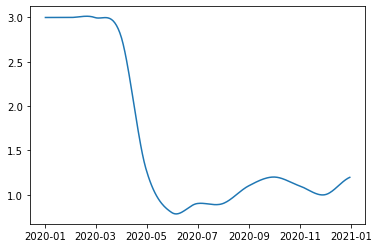

In [2]:
start,end = datetime.datetime(2020,1,1),datetime.datetime(2020,12,31)
dr1 = pd.date_range(start,end,freq='M')
dr2 = pd.date_range(start,end,freq='D')


y = tt.cast(np.array([3,3,2.8,1.3,.8,.9,.9,1.1,1.2,1.1,1,1.2],"float64").reshape(1,12),"float64")

s1 = Spline(dr1,y)
print(s1.ref)
v = s1.EvaluateAt(dr2).eval()

print(y.shape)

print(dr1)

plt.plot(dr2,v)

#cpx = np.array([],"float64")
#cpy1 = np.array([1,1,2,2],"float64")
#cpy2 = np.array([1,30,-30,-1],"float64")
#cpy3 = np.array([4,3,4,-3,-4,-3.5],dtype="float64")

#cpx = np.array(cpx)
#cpy_r1 = tt.cast(cpy1.reshape((1,cpy1.shape[0])),"float64")
#cpy_r2 = tt.stack([cpy1,cpy2])

#space = np.linspace(1.5,3.5,32,"float64")

#print(cpx)
#print(space,space.dtype)


#s1 = Spline(cpx,cpy_r1)
#s2 = Spline(cpx,cpy_r2)
#c1 = s1.EvaluateAt(space,True)
#c2 = s2.EvaluateAt(space,True)

#plt.plot(space,c1.eval())
#plt.plot(space,c2.eval()[:,0])


#print(c.eval())